In [138]:
import numpy as np

In [139]:
import pandas as pd

In [140]:
import matplotlib.pyplot as plt

In [141]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [142]:
STEEL_PATH = r"C:\Users\David\OneDrive\Desktop\4th year subjects\Machine Learning\steel.csv"
df = pd.read_csv(STEEL_PATH)
df.head()

,normalising_temperature,tempering_temperature,percent_silicon,percent_chromium,percent_copper,percent_nickel,percent_sulphur,percent_carbon,percent_manganese,tensile_strength
0,178.500,275,0.1530,0.970575,0.942,0.8870,0.0,1.920,0.0,25.107613
1,178.500,950,0.1530,1.212726,0.942,0.8870,0.0,1.920,0.0,140.035334
2,178.500,375,0.1530,1.621165,0.942,0.8870,0.0,1.920,0.0,42.217650
3,178.500,900,0.1530,0.809989,0.942,0.8870,0.0,1.920,0.0,95.015309
4,189.525,900,0.1624,1.036229,0.849,0.9382,0.0,2.035,0.0,113.266773


In [143]:
numeric_df = df.select_dtypes(include=[np.number]).dropna()

print("Numeric columns detected:")
print(numeric_df.columns)

Numeric columns detected:
Index(['normalising_temperature', 'tempering_temperature', 'percent_silicon',
       'percent_chromium', 'percent_copper', 'percent_nickel',
       'percent_sulphur', 'percent_carbon', 'percent_manganese',
       'tensile_strength'],
      dtype='object')


In [144]:
target_col = numeric_df.columns[-1]
feature_cols = numeric_df.columns[:-1]

In [145]:
print("Target column:", target_col)
print("Feature columns:", list(feature_cols))

Target column: tensile_strength
Feature columns: ['normalising_temperature', 'tempering_temperature', 'percent_silicon', 'percent_chromium', 'percent_copper', 'percent_nickel', 'percent_sulphur', 'percent_carbon', 'percent_manganese']


In [146]:
X = numeric_df[feature_cols].values
y = numeric_df[target_col].values

In [147]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [148]:
scaler = StandardScaler()

In [149]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [150]:
param_grid = {"n_neighbors": [1, 3, 5, 7, 9, 11, 13],"weights": ["uniform", "distance"]}

In [151]:
knn = KNeighborsRegressor(metric="minkowski", p=2)

In [152]:
grid_search = GridSearchCV(estimator=knn,param_grid=param_grid,cv=5,scoring="r2",n_jobs=-1)

In [153]:
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(), n_jobs=-1,
             param_grid={'n_neighbors': [1, 3, 5, 7, 9, 11, 13],
                         'weights': ['uniform', 'distance']},
             scoring='r2')

In [154]:
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation R² Score:", grid_search.best_score_)

Best Parameters: {'n_neighbors': 7, 'weights': 'distance'}
Best Cross-Validation R² Score: 0.773723794164422


In [155]:
best_knn = grid_search.best_estimator_

In [156]:
y_pred = best_knn.predict(X_test_scaled)

In [157]:
mse = mean_squared_error(y_test, y_pred)

In [158]:
mae = mean_absolute_error(y_test, y_pred)

In [159]:
r2  = r2_score(y_test, y_pred)

In [160]:
print("\nPerformance of Best Model:")
print(f"MSE: {mse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"R²:  {r2:.4f}")


Performance of Best Model:
MSE: 2366.7426
MAE: 35.5011
R²:  0.7581


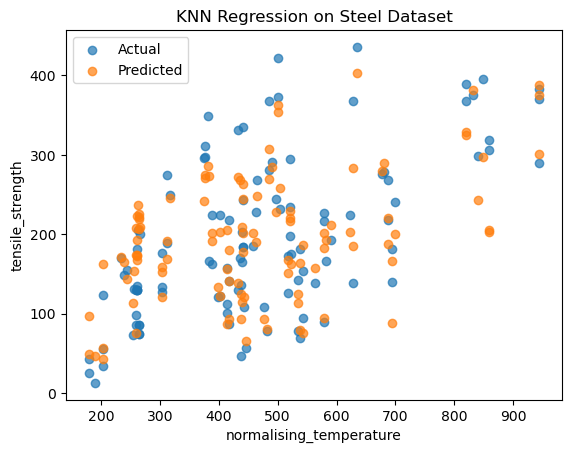

In [161]:
feat = 0
plt.scatter(X_test[:, feat], y_test, label="Actual", alpha=0.7)
plt.scatter(X_test[:, feat], y_pred, label="Predicted", alpha=0.7)
plt.xlabel(feature_cols[feat])
plt.ylabel(target_col)
plt.title("KNN Regression on Steel Dataset")
plt.legend()
plt.show()